# Table of Contents
1. [Simple Linear Regression](#Simple-Linear-Regression)
2. [Multiple Linear Regression](#Multiple-Linear-Regression)
 1. [Multicollinearity Tests](#Multicollinearity-tests)
 2. [Heteroscedascity Tests](#Heteroscedascity-tests)
 3. [Other](#Other)
3. [Ridge/LASSO Regression](#Ridge-and-Lasso-Regression)
4. [GLSAR](#GLSAR)
5. [VAR](#VAR)
6. [Polynomial Features (Unfinished)](#Polynomial-Features)

# Simple Linear Regression

In [102]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from datetime import datetime
import statsmodels.api as sm
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
from statsmodels.sandbox.regression.predstd import wls_prediction_std
from scipy.stats.stats import pearsonr
import numpy as np
from statsmodels import regression
import math
data = pd.read_csv("C:/Users/msteinme/Documents/CrudeUreaCorrelation.csv")
data.head()

,Date,Crude,Urea
0,1/5/1996,19.65,220
1,1/12/1996,17.98,220
2,1/19/1996,18.25,218
3,1/26/1996,17.36,215
4,2/2/1996,17.38,205


In [103]:
data['Date'] = pd.to_datetime(data['Date'])
date = data['Date']
print(data.dtypes)
data.index = data['Date'].values
data = data.drop(['Date'],axis=1)
data.head(2)

Date     datetime64[ns]
Crude           float64
Urea              int64
dtype: object


,Crude,Urea
1996-01-05,19.65,220
1996-01-12,17.98,220


In [96]:
#fit a OLS model with all, see how R^2 changes
X = data[['Crude']]
Y = data[['Urea']]
X= sm.add_constant(X)
est= sm.OLS(Y,X).fit()
r_square = est.rsquared
print(r_square)
est.summary()

0.757239751857


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   Urea   R-squared:                       0.757
Model:                            OLS   Adj. R-squared:                  0.757
Method:                 Least Squares   F-statistic:                     3325.
Date:                Tue, 21 Jun 2016   Prob (F-statistic):               0.00
Time:                        10:30:22   Log-Likelihood:                -6000.5
No. Observations:                1068   AIC:                         1.200e+04
Df Residuals:                    1066   BIC:                         1.201e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const         52.6961      4.129     12.763      0.000        44.595    60.797
Crude          3.7797      0.066     57.664      0.000         3.651     3.908
==============================================================================
Omnibus:                      360.468   Durbin-Watson:                   0.058
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1769.191
Skew:                           1.491   Prob(JB):                         0.00
Kurtosis:                       8.555   Cond. No.                         127.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

0.757239751857


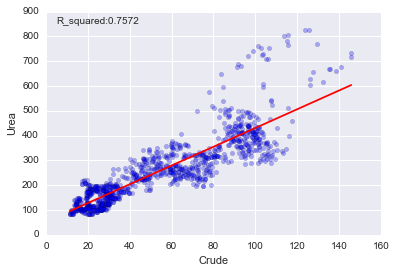

In [104]:
# We pick 100 hundred points equally spaced from the min to the max
X = data[['Crude']]
Y = data[['Urea']]
X= sm.add_constant(X)
est= sm.OLS(Y,X).fit()
r_square = est.rsquared
print(r_square)

X_prime = np.linspace(data.Crude.min(), data.Crude.max(), 100)[:, np.newaxis]
X_prime = sm.add_constant(X_prime)
y_hat = est.predict(X_prime)
plt.scatter(data.Crude,data.Urea,alpha=0.3)
plt.xlabel('Crude')
plt.ylabel('Urea')
plt.plot(X_prime[:, 1], y_hat, 'r')
plt.text(5,850,'R_squared:0.7572')

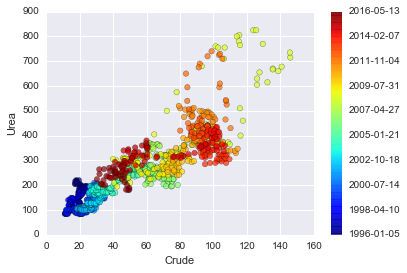

In [97]:
# Plot data and use colormap to indicate the date each point corresponds to
X = data[['Crude']]
Y = data[['Urea']]
cm = plt.get_cmap('jet')
colors = np.linspace(0.1, 1, len(X))
sc = plt.scatter(X, Y, s=30, c=colors, cmap=cm, edgecolor='k', alpha=0.7)
cb = plt.colorbar(sc)
cb.ax.set_yticklabels([str(p.date()) for p in X[::len(X)//9].index])
plt.xlabel('Crude')
plt.ylabel('Urea')

In [113]:
from statsmodels.tsa.stattools import coint
#show difference between cointegration and correlation
X = data[['Crude']]
Y = data[['Urea']]
# compute the p-value of the cointegration test
# will inform us as to whether the ratio between the 2 timeseries is stationary
# around its mean
score, pvalue, _ = coint(X,Y)
print (pvalue) #shows they are cointegrated
print(data.corr())

0.00619630590883
          Crude      Urea
Crude  1.000000  0.870195
Urea   0.870195  1.000000


### The regression model relies on several assumptions:
#### •The independent variable is not random.
#### •The variance of the error term is constant across observations. This is important for evaluating the goodness of the fit.
#### •The errors are not autocorrelated. The Durbin-Watson statistic detects this; if it is close to 2, there is no autocorrelation.
#### •The errors are normally distributed. If this does not hold, we cannot use some of the statistics, such as the F-test.

# Multiple Linear Regression
[Top](#Table-of-contents)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from datetime import datetime
import statsmodels.api as sm
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
from statsmodels.sandbox.regression.predstd import wls_prediction_std
from scipy.stats.stats import pearsonr
import numpy as np
from statsmodels import regression
import math
data = pd.read_csv("C:/Users/msteinme/Documents/ureamorevariables.csv")
df_96on = data[['Date','Dollar','Crude','Corn','Gas','My_Coal','Monthly Imports','Urea_Prod','Urea_Inventory','UAN_Inventory','UAN','Urea']]
from datetime import datetime
df_96on['Date'] = pd.to_datetime(df_96on['Date'])
date = df_96on['Date']
#df_96on.index = df_96on['Date'].values
#df_96on = df_96on.drop(['Date'],axis=1)
#df_96on.head(2)

C:\Users\msteinme\AppData\Local\Continuum\Anaconda3\lib\site-packages\ipykernel\__main__.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [37]:
#linear regression using scikitlearn
from sklearn.linear_model import LinearRegression
from sklearn.cross_validation import train_test_split
import numpy as np 
X = df_96on[['Dollar','Crude','Corn','My_Coal','Gas','Urea_Inventory','UAN_Inventory']].values
y = df_96on['UAN'].values
X_train, X_test, y_train, y_test= train_test_split(X,y,test_size=0.3,random_state=1)

regr = LinearRegression()
regr.fit(X_train,y_train) #should use X_train and y_train
LinearRegression(fit_intercept=True)
print (regr.coef_)
# The mean square error
print(np.mean((regr.predict(X_test) - y_test)**2))
#explained variance score: 1 is perfect prediction
regr.score(X_test,y_test)

[  8.89315702e-01   8.02325197e-01   2.02296043e-01   1.18464167e+00
   6.49350374e+00  -1.19539059e-05  -3.26027522e-06]
1280.62429219


0.85409186047777819

In [139]:
#fit a OLS model with all, see how R^2 changes
X = df_96on[['Dollar','Crude','Corn','Gas','My_Coal','Urea_Inventory','UAN_Inventory','UAN']]
Y = df_96on[['Urea']]
X= sm.add_constant(X)
est= sm.OLS(Y,X).fit()
r_square = est.rsquared
print(r_square)
est.summary()

0.920881959899


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   Urea   R-squared:                       0.921
Model:                            OLS   Adj. R-squared:                  0.920
Method:                 Least Squares   F-statistic:                     1536.
Date:                Tue, 21 Jun 2016   Prob (F-statistic):               0.00
Time:                        11:50:46   Log-Likelihood:                -5387.6
No. Observations:                1065   AIC:                         1.079e+04
Df Residuals:                    1056   BIC:                         1.084e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [95.0% Conf. Int.]
----------------------------------------------------------------------------------
const            137.7828     19.452      7.083      0.000        99.614   175.951
Dollar            -0.9413      0.171     -5.496      0.000        -1.277    -0.605
Crude              0.0328      0.109      0.301      0.763        -0.181     0.247
Corn               0.0081      0.018      0.448      0.654        -0.028     0.044
Gas               -0.2026      0.744     -0.272      0.786        -1.663     1.258
My_Coal            0.2834      0.100      2.826      0.005         0.087     0.480
Urea_Inventory  -7.41e-05   1.23e-05     -6.014      0.000     -9.83e-05 -4.99e-05
UAN_Inventory   9.095e-06   3.92e-06      2.319      0.021       1.4e-06  1.68e-05
UAN                1.1220      0.033     34.422      0.000         1.058     1.186
==============================================================================
Omnibus:                      274.771   Durbin-Watson:                   0.118
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1494.722
Skew:                           1.074   Prob(JB):                         0.00
Kurtosis:                       8.391   Cond. No.                     1.97e+07
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.97e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [140]:
data = df_96on[['Dollar','Crude','Corn','Gas','My_Coal','Urea_Inventory','UAN_Inventory','UAN']]
response = df_96on['Urea'] # need to have in the series format
Y = np.array(Y)

In [141]:
#forward stepwise regression formula
def forward_aic(response, data):
    # This function will work with pandas dataframes and series
    
    # Initialize some variables
    explanatory = list(data.columns)
    selected = pd.Series(np.ones(data.shape[0]), name="Intercept")
    current_score, best_new_score = np.inf, np.inf
    
    # Loop while we haven't found a better model
    while current_score == best_new_score and len(explanatory) != 0:
        
        scores_with_elements = []
        count = 0
        
        # For each explanatory variable
        for element in explanatory:
            # Make a set of explanatory variables including our current best and the new one
            tmp = pd.concat([selected, data[element]], axis=1)
            # Test the set
            result = regression.linear_model.OLS(Y, tmp).fit()
            score = result.aic
            scores_with_elements.append((score, element, count))
            count += 1
        
        # Sort the scoring list
        scores_with_elements.sort(reverse = True)
        # Get the best new variable
        best_new_score, best_element, index = scores_with_elements.pop()
        if current_score > best_new_score:
            # If it's better than the best add it to the set
            explanatory.pop(index)
            selected = pd.concat([selected, data[best_element]],axis=1)
            current_score = best_new_score
    # Return the final model
    model = regression.linear_model.OLS(Y, selected).fit()
    return model

In [157]:
#results of stepwise regression 
result = forward_aic(Y, data)
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.921
Model:                            OLS   Adj. R-squared:                  0.920
Method:                 Least Squares   F-statistic:                     2463.
Date:                Tue, 21 Jun 2016   Prob (F-statistic):               0.00
Time:                        12:18:07   Log-Likelihood:                -5388.0
No. Observations:                1065   AIC:                         1.079e+04
Df Residuals:                    1059   BIC:                         1.082e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [95.0% Conf. Int.]
----------------------------------------------------------------------------------
Intercept        140.2557     16.522      8.489      0.000       107.836   172.676
UAN                1.1291      0.028     39.993      0.000         1.074     1.184
Dollar            -0.9639      0.161     -5.996      0.000        -1.279    -0.648
Urea_Inventory -7.571e-05   1.12e-05     -6.758      0.000     -9.77e-05 -5.37e-05
My_Coal            0.3164      0.087      3.655      0.000         0.147     0.486
UAN_Inventory   9.864e-06   3.58e-06      2.752      0.006      2.83e-06  1.69e-05
==============================================================================
Omnibus:                      274.048   Durbin-Watson:                   0.118
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1496.081
Skew:                           1.070   Prob(JB):                         0.00
Kurtosis:                       8.398   Cond. No.                     1.67e+07
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.67e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

#### The above model has a kurtosis > 3 so it is highly peaked and has fat tails, Prob(JB) < 0.05 likely model doesn't follow a normal distribution, DW less than 2 so positive autocorrelation

In [143]:
print('Parameters: ', result.params)
print('Standard errors: ', result.bse)
print('Predicted values: ', result.predict())

Parameters:  Intercept         140.255724
UAN                 1.129059
Dollar             -0.963898
Urea_Inventory     -0.000076
My_Coal             0.316388
UAN_Inventory       0.000010
dtype: float64
Standard errors:  Intercept         16.522223
UAN                0.028231
Dollar             0.160769
Urea_Inventory     0.000011
My_Coal            0.086556
UAN_Inventory      0.000004
dtype: float64
Predicted values:  [ 162.8798661   163.93553373  163.5091453  ...,  254.5370451   253.96381018
  248.49063301]


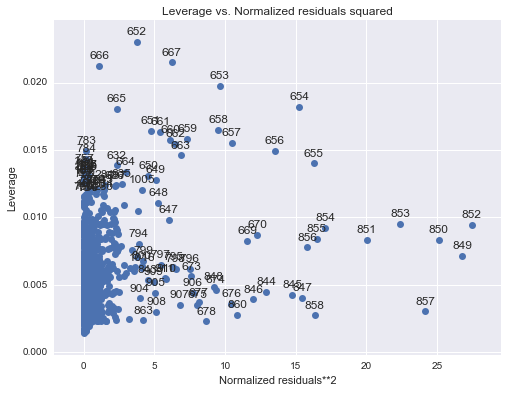

In [145]:
from statsmodels.graphics.regressionplots import plot_leverage_resid2
fig, ax = plt.subplots(figsize=(8,6))
fig = plot_leverage_resid2(result, ax = ax)


### Multicollinearity tests

In [147]:
#multicollinearity condition number, If the Condition Number is above 30
# the regression may have significant multicollinearity
print(np.linalg.cond(result.model.exog))
VIF = 1/(1-0.920) #1/1-R2 adj
print(VIF) #greater than 10 so bad

16722602.828
12.500000000000007


### Heteroscedascity tests

In [153]:
import statsmodels.stats.api as sms
name = ['Lagrange multiplier statistic', 'p-value',
        'f-value', 'f p-value']
test = sms.het_breushpagan(result.resid, result.model.exog)
print(name,test)

['Lagrange multiplier statistic', 'p-value', 'f-value', 'f p-value'] (219.89963321848114, 1.5612348403589525e-45, 55.111492251564869, 5.715365281607304e-51)


In [154]:
name = ['F statistic', 'p-value']
test = sms.het_goldfeldquandt(result.resid, result.model.exog)
print(name, test)

['F statistic', 'p-value'] (8.9638990213117484, 6.8564292455509746e-119, 'increasing')


### Other

In [137]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.feature_selection import SelectFromModel
from sklearn.feature_selection import RFECV
X = df_96on[['Dollar','Crude','Corn','Gas','My_Coal','Urea_Inventory','UAN_Inventory']]
Y = df_96on[['UAN']]
#order is 'Dollar','Crude','Corn','Gas','My_Coal','Urea_Inventory','UAN_Inventory'
regression = LinearRegression()
selector = RFECV(estimator=regression, cv=10,
   scoring='mean_squared_error')
selector.fit(X, Y)

sfm = SelectFromModel(regression, threshold = 0.25)
print("Optimal number of features: %d" 
   % selector.n_features_)
print ([selector.support_])
print(selector.ranking_)
print(selector) 
#indicating using dollar, crude, corn, gas, coal

Optimal number of features: 5
[array([ True,  True,  True,  True,  True, False, False], dtype=bool)]
[1 1 1 1 1 2 3]
RFECV(cv=10,
   estimator=LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False),
   estimator_params=None, scoring='mean_squared_error', step=1, verbose=0)


C:\Users\msteinme\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\utils\validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [124]:
def find_cointegrated_pairs(data):
    n = data.shape[1]
    score_matrix = np.zeros((n, n))
    pvalue_matrix = np.ones((n, n))
    keys = data.keys()
    pairs = []
    for i in range(n):
        for j in range(i+1, n):
            S1 = data[keys[i]]
            S2 = data[keys[j]]
            result = coint(S1, S2)
            score = result[0]
            pvalue = result[1]
            score_matrix[i, j] = score
            pvalue_matrix[i, j] = pvalue
            if pvalue < 0.05:
                pairs.append((keys[i], keys[j]))
    return score_matrix, pvalue_matrix, pairs

[('Crude', 'My_Coal'), ('Crude', 'UAN'), ('Corn', 'My_Coal'), ('Corn', 'UAN'), ('My_Coal', 'UAN'), ('Urea_Inventory', 'UAN_Inventory'), ('Urea_Inventory', 'UAN'), ('UAN_Inventory', 'UAN')]


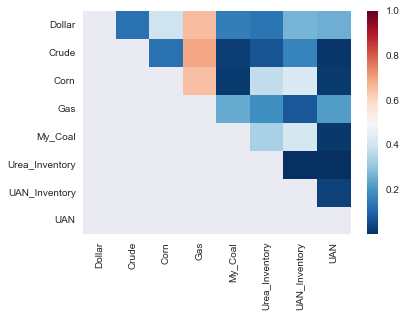

In [133]:
#cointegration heat map
#cointegrated timeseries might not necessarily follow a similar path to a same destination, 
#but they both end up at this destination on expectation.
cols= ['Dollar','Crude','Corn','Gas','My_Coal','Urea_Inventory','UAN_Inventory','UAN']
scores, pvalues, pairs = find_cointegrated_pairs(data)
import seaborn
seaborn.heatmap(pvalues, yticklabels=cols,xticklabels=cols,cmap='RdBu_r' 
                , mask = (pvalues >= 0.95)
                )
print (pairs)

In [83]:
import scipy.stats as stats
print ("Excess kurtosis of Model: ", stats.kurtosis(data)) #x variables then y variable

Excess kurtosis of Urea:  [-1.04061198  2.08009794]


In [99]:
# showing how to do confidence intervals and etc of urea
mean_urea = np.mean(Y)
SE = stats.sem(Y, ddof=0)
print ('sample standard deviation of urea: ', np.std(Y))
print('standard error of urea: ',stats.sem(Y, ddof=0))
print ('95% confidence interval:', stats.t.interval(0.95, df = 9, loc=mean_urea, scale=SE))
print ('95% CI assuming normality: ',stats.norm.interval(0.95, loc=mean_urea, scale=SE))
#print ('spearman rank coefficient: ', stats.spearmanr(data))

sample standard deviation of urea:  Urea    135.278206
dtype: float64
standard error of urea:  [ 4.13944588]
95% confidence interval: (array([ 250.26888166]), array([ 268.99703594]))
95% CI assuming normality:  (array([ 251.51979397]), array([ 267.74612364]))
spearman rank coefficient:  SpearmanrResult(correlation=0.90489134624956868, pvalue=0.0)


In [101]:
from statsmodels.tsa.stattools import coint
# compute the p-value of the cointegration test
# will inform us as to whether the ratio between the 2 timeseries is stationary
# around its mean
score, pvalue, _ = coint(X,Y)
print (pvalue)

0.00619630590883


# Ridge and Lasso Regression
[Top](#Table-of-contents)

### Ridge Regression: Performs L2 regularization, i.e. adds penalty equivalent to square of the magnitude of coefficients and Minimization objective = LS Obj + α * (sum of square of coefficients)
### Lasso Regression: ◦Performs L1 regularization, i.e. adds penalty equivalent to absolute value of the magnitude of coefficients and Minimization objective = LS Obj + α * (sum of absolute value of coefficients)
##### http://www.analyticsvidhya.com/blog/2016/01/complete-tutorial-ridge-lasso-regression-python/

In [47]:
# Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.cross_validation import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.linear_model import Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.cross_validation import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
X = df_96on[['Dollar','Crude','Corn','My_Coal','Gas','Urea_Inventory','UAN_Inventory']].values
y = df_96on['UAN'].values
X_train, X_test, y_train, y_test= train_test_split(X,y,test_size=0.3,random_state=1)


alpha = 0.1  #the higher this gets the less features chosen
lasso = Lasso(alpha=alpha)

y_pred_lasso = lasso.fit(X_train, y_train).predict(X_test)
print (lasso)
print ("r^2 on test data : %f" % (1 - np.linalg.norm(y_test - y_pred_lasso)**2
                                      / np.linalg.norm(y_test)**2))
print(lasso.coef_)
print(lasso.intercept_)


Lasso(alpha=0.1, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)
r^2 on test data : 0.969016
[  8.85509241e-01   8.03963333e-01   2.01827562e-01   1.18453088e+00
   6.45689719e+00  -1.17383030e-05  -3.34380594e-06]
-104.723557059


In [48]:
from sklearn import linear_model
from sklearn.cross_validation import train_test_split

X = df_96on[['Dollar','Crude','Corn','My_Coal','Gas','Urea_Inventory','UAN_Inventory']].values
y = df_96on['UAN'].values
X_train, X_test, y_train, y_test= train_test_split(X,y,test_size=0.3,random_state=1)

model = linear_model.LassoCV() #1 is the default
results = model.fit(X,y)
print(model.coef_)
print(results)
print(model.alphas)

[ -0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00  -1.25383211e-04  -7.65866857e-05]
LassoCV(alphas=None, copy_X=True, cv=None, eps=0.001, fit_intercept=True,
    max_iter=1000, n_alphas=100, n_jobs=1, normalize=False, positive=False,
    precompute='auto', random_state=None, selection='cyclic', tol=0.0001,
    verbose=False)
None


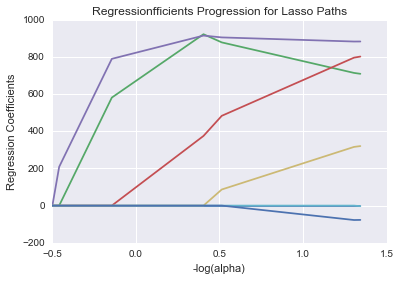

In [54]:
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LassoLarsCV

X = df_96on[['Dollar','Crude','Corn','My_Coal','Gas','Urea_Inventory','UAN_Inventory']].values
y = df_96on['UAN'].values
# split data into train and test sets
pred_train, pred_test, tar_train, tar_test = train_test_split(X,y, test_size=.3, random_state=123)
# specify the lasso regression model
model=LassoLarsCV(cv=10, precompute=False).fit(pred_train,tar_train)

# plot coefficient progression
m_log_alphas = -np.log10(model.alphas_)
ax = plt.gca()
plt.plot(m_log_alphas, model.coef_path_.T)
plt.axvline(-np.log10(model.alpha_), linestyle='--', color='k',
 label='alpha CV')
plt.ylabel('Regression Coefficients')
plt.xlabel('-log(alpha)')
plt.title('Regressionfficients Progression for Lasso Paths')

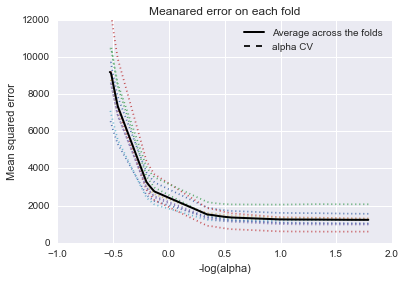

In [55]:
# plot mean square error for each fold
m_log_alphascv = -np.log10(model.cv_alphas_)
plt.figure()
plt.plot(m_log_alphascv, model.cv_mse_path_, ':')
plt.plot(m_log_alphascv, model.cv_mse_path_.mean(axis=-1), 'k',
 label='Average across the folds', linewidth=2)
plt.axvline(-np.log10(model.alpha_), linestyle='--', color='k',
 label='alpha CV')
plt.legend()
plt.xlabel('-log(alpha)')
plt.ylabel('Mean squared error')
plt.title('Meanared error on each fold')

In [56]:
# MSE from training and test data
from sklearn.metrics import mean_squared_error
train_error = mean_squared_error(tar_train, model.predict(pred_train))
test_error = mean_squared_error(tar_test, model.predict(pred_test))
print ('training data MSE')
print(train_error)
print ('test data MSE')
print(test_error)

training data MSE
1203.81441854
test data MSE
1528.67026945


In [57]:
# R-square from training and test data
rsquared_train=model.score(pred_train,tar_train)
rsquared_test=model.score(pred_test,tar_test)
print ('training data R-square')
print(rsquared_train)
print ('test data R-square')
print(rsquared_test)

training data R-square
0.868716039527
test data R-square
0.840085197893


In [171]:
# Ridge regression
from sklearn.linear_model import Ridge

clf = Ridge(alpha=0.1)
y_pred_ridge = clf.fit(X_train, y_train).predict(X_test)
print(clf.coef_)
print(clf.intercept_)
y_pred_ridge

[  8.89300553e-01   8.02343877e-01   2.02291786e-01   1.18464306e+00
   6.49318093e+00  -1.19520455e-05  -3.26102158e-06]
-105.321997328


array([  77.86209134,  176.81879254,  215.35363795,  113.164508  ,
        192.41557663,  116.84461992,   83.77177398,  149.53041392,
        103.39370504,   92.63550218,   82.27132141,  309.9322171 ,
         70.43167667,  195.75084107,  177.90488395,  282.19867632,
        349.10022626,   86.46113874,  182.75126004,  256.28707877,
        110.22142987,  181.83028215,  331.26331883,   96.58889043,
        200.39578831,   88.83088667,  308.23109501,  102.60568024,
        316.99824467,  169.40534442,   91.43120965,   90.96927468,
        170.83909753,  231.13788523,   86.40929964,  219.66297408,
         79.98979973,  187.816276  ,   97.16279767,  100.29356699,
         91.48349474,   94.01963175,  173.71744411,  198.27892109,
        107.93108533,   77.21031034,  138.03435643,  163.55368766,
         84.50129618,  312.12301203,  262.02270599,  288.5518434 ,
        172.43475254,  291.08636087,  164.41359083,  235.12243646,
        201.10890371,  266.89644287,  166.40884689,  274.47151

In [185]:
#Bayesian Ridge Regression
from sklearn import linear_model
X = df_96on[['Dollar','Crude','Corn','My_Coal','Gas','Urea_Inventory','UAN_Inventory']].values
y = df_96on['UAN'].values
clf = linear_model.BayesianRidge()
print(clf.fit(X, Y))
print(clf.coef_)
print(clf.intercept_)

BayesianRidge(alpha_1=1e-06, alpha_2=1e-06, compute_score=False, copy_X=True,
       fit_intercept=True, lambda_1=1e-06, lambda_2=1e-06, n_iter=300,
       normalize=False, tol=0.001, verbose=False)
[ -2.30079801e-02   9.23266062e-01   2.30697636e-01   1.60832761e+00
   5.42457990e+00  -8.58958775e-05   3.20586953e-07]
41.6391009643


C:\Users\msteinme\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\utils\validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [3]:
#chooses best alpha to use in model for ridge (cross validation)
from sklearn.linear_model import RidgeCV
rcv2 = RidgeCV(alphas=np.array([.08, .09, .1, .11, .12]))
print(rcv2.fit(X,y))
rcv2.alpha_

RidgeCV(alphas=array([ 0.08,  0.09,  0.1 ,  0.11,  0.12]), cv=None,
    fit_intercept=True, gcv_mode=None, normalize=False, scoring=None,
    store_cv_values=False)


0.12

In [4]:
#chooses best alpha to use in model for lasso (cross validation)
from sklearn.linear_model import LassoCV
lassocv = LassoCV(alphas=np.array([.08, .09, .1, .11, .12]))
print(lassocv.fit(X,y))
print(lassocv.alpha_)

LassoCV(alphas=array([ 0.08,  0.09,  0.1 ,  0.11,  0.12]), copy_X=True,
    cv=None, eps=0.001, fit_intercept=True, max_iter=1000, n_alphas=100,
    n_jobs=1, normalize=False, positive=False, precompute='auto',
    random_state=None, selection='cyclic', tol=0.0001, verbose=False)
0.12


## GLSAR
[Top](#Table-of-contents)

In [58]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from datetime import datetime
import statsmodels.api as sm
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
from statsmodels.sandbox.regression.predstd import wls_prediction_std
from scipy.stats.stats import pearsonr
import numpy as np
from statsmodels import regression
import math
data = pd.read_csv("C:/Users/msteinme/Documents/ureamorevariables.csv")
df_96on = data[['Date','Dollar','Crude','Corn','Gas','My_Coal','Monthly Imports','Urea_Prod','Urea_Inventory','UAN_Inventory','UAN','Urea']]
from datetime import datetime
df_96on['Date'] = pd.to_datetime(df_96on['Date'])
date = df_96on['Date']

C:\Users\msteinme\AppData\Local\Continuum\Anaconda3\lib\site-packages\ipykernel\__main__.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [69]:
#fit a OLS model with all, see how R^2 changes
X = df_96on[['Dollar','Crude','Corn','Gas','My_Coal','Urea_Inventory','UAN_Inventory','UAN']]
Y = df_96on[['Urea']]
X= sm.add_constant(X)
est= sm.OLS(Y,X).fit()
r_square = est.rsquared
print(r_square)
est.summary()

0.920881959899


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   Urea   R-squared:                       0.921
Model:                            OLS   Adj. R-squared:                  0.920
Method:                 Least Squares   F-statistic:                     1536.
Date:                Wed, 22 Jun 2016   Prob (F-statistic):               0.00
Time:                        14:23:32   Log-Likelihood:                -5387.6
No. Observations:                1065   AIC:                         1.079e+04
Df Residuals:                    1056   BIC:                         1.084e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [95.0% Conf. Int.]
----------------------------------------------------------------------------------
const            137.7828     19.452      7.083      0.000        99.614   175.951
Dollar            -0.9413      0.171     -5.496      0.000        -1.277    -0.605
Crude              0.0328      0.109      0.301      0.763        -0.181     0.247
Corn               0.0081      0.018      0.448      0.654        -0.028     0.044
Gas               -0.2026      0.744     -0.272      0.786        -1.663     1.258
My_Coal            0.2834      0.100      2.826      0.005         0.087     0.480
Urea_Inventory  -7.41e-05   1.23e-05     -6.014      0.000     -9.83e-05 -4.99e-05
UAN_Inventory   9.095e-06   3.92e-06      2.319      0.021       1.4e-06  1.68e-05
UAN                1.1220      0.033     34.422      0.000         1.058     1.186
==============================================================================
Omnibus:                      274.771   Durbin-Watson:                   0.118
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1494.722
Skew:                           1.074   Prob(JB):                         0.00
Kurtosis:                       8.391   Cond. No.                     1.97e+07
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.97e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [72]:
acf, Q, pvalue = tsa.acf(est.resid, nlags=4, qstat=True,unbiased=True)
#partial autocorrelation
print(tsa.pacf(est.resid, nlags=4))
print(acf)
print(Q)
print(pvalue)

[ 1.          0.93965643  0.03224239 -0.05796181 -0.17588632]
[ 1.          0.93965643  0.88672804  0.82987435  0.75657271]
[  942.99758118  1783.54389589  2520.45345599  3133.50922748]
[  4.41471288e-207   0.00000000e+000   0.00000000e+000   0.00000000e+000]


In [74]:
# if we assume that there is strong autocorrelation in the errors we can estimate model with GLSAR
#let us consider 4 lags in the autoregressive error
mod3 = sm.GLSAR(Y,X, rho=4)
est2 = mod3.iterative_fit()
print(est.params)
print(est2.params)
print(mod3.rho)

const             137.782833
Dollar             -0.941327
Crude               0.032812
Corn                0.008144
Gas                -0.202622
My_Coal             0.283386
Urea_Inventory     -0.000074
UAN_Inventory       0.000009
UAN                 1.121971
dtype: float64
const             182.196008
Dollar             -0.686996
Crude               0.538070
Corn               -0.036172
Gas                -2.788663
My_Coal             0.518309
Urea_Inventory     -0.000016
UAN_Inventory      -0.000007
UAN                 0.643472
dtype: float64
[ 0.9835885   0.09316998  0.04942258 -0.18064459]


In [60]:
tsa = sm.tsa
mdata = sm.datasets.macrodata.load().data 
endog = np.log(mdata['m1'])
exog = np.column_stack([np.log(mdata['realgdp']),np.log(mdata['cpi'])])
exog = sm.add_constant(exog,prepend=True)
res1 = sm.OLS(endog,exog).fit()
res1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.990
Model:                            OLS   Adj. R-squared:                  0.990
Method:                 Least Squares   F-statistic:                     9871.
Date:                Wed, 22 Jun 2016   Prob (F-statistic):          1.34e-200
Time:                        14:12:41   Log-Likelihood:                 221.75
No. Observations:                 203   AIC:                            -437.5
Df Residuals:                     200   BIC:                            -427.6
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const         -1.5016      0.353     -4.256      0.000        -2.197    -0.806
x1             0.4304      0.060      7.173      0.000         0.312     0.549
x2             0.8856      0.040     21.876      0.000         0.806     0.965
==============================================================================
Omnibus:                        3.694   Durbin-Watson:                   0.037
Prob(Omnibus):                  0.158   Jarque-Bera (JB):                3.660
Skew:                           0.183   Prob(JB):                        0.160
Kurtosis:                       3.546   Cond. No.                         622.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [71]:
acf, Q, pvalue = tsa.acf(res1.resid, nlags=4, qstat=True,unbiased=True)
#partial autocorrelation
print(tsa.pacf(res1.resid, nlags=4))
print(acf)
print(Q)
print(pvalue)
#The strong autocorrelation indicates that either our model
#is misspecified or there is strong autocorrelation in the errors.

[ 1.          0.98234045 -0.49702659 -0.06231143 -0.22697109]
[ 1.          0.98234045  0.94759323  0.90362911  0.84956461]
[ 198.80284036  384.71069635  554.61341702  705.54830795]
[  3.81138443e-045   2.89157008e-084   6.94932940e-120   2.19208642e-151]


In [73]:
# if we assume that there is strong autocorrelation in the errors we can estimate model with GLSAR
#let us consider 4 lags in the autoregressive error
mod2 = sm.GLSAR(endog, exog, rho=4)
res2 = mod2.iterative_fit()
print(res1.params)
print(res2.params)
print(mod2.rho)

[-1.50164255  0.43040832  0.88560075]
[-0.65385327  0.37192015  0.81598117]
[ 1.35735589 -0.38742981  0.19055313 -0.18802612]


## VAR
[Top](#Table-of-contents)

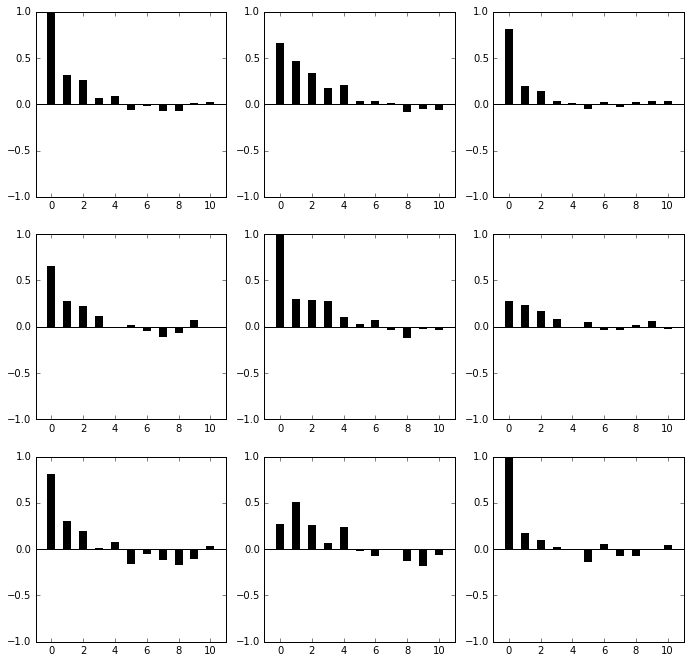

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import statsmodels.api as sm
tsa = sm.tsa
# fit the model with two lags of the log differentiated data, VAR sample autocorrelation
mdata = sm.datasets.macrodata.load().data
mdata = mdata[['realgdp','realcons','realinv']]
names = mdata.dtype.names
data = mdata.view((float,3))
data = np.diff(np.log(data), axis=0)
model = tsa.VAR(data)
res = model.fit(2)
res.plot_sample_acorr()

In [6]:

data

array([[  2.49421308e-02,   1.52861074e-02,   8.02126813e-02],
       [ -1.19295211e-03,   1.03859777e-02,  -7.21310437e-02],
       [  3.49453265e-03,   1.08401095e-03,   3.44251112e-02],
       [  2.21901795e-02,   9.53415088e-03,   1.02663768e-01],
       [ -4.68455328e-03,   1.25724280e-02,  -1.06693845e-01],
       [  1.63288019e-03,  -3.96792652e-03,  -5.97787919e-03],
       [ -1.29063599e-02,   1.34303322e-03,  -1.31852018e-01],
       [  5.92259126e-03,  -2.79649880e-04,   2.52441808e-02],
       [  1.85345342e-02,   1.47698410e-02,   7.18338737e-02],
       [  1.60316392e-02,   4.83863043e-03,   8.04527066e-02],
       [  2.01528160e-02,   1.98230620e-02,   1.67371134e-02],
       [  1.77772593e-02,   1.05911661e-02,   5.79106403e-02],
       [  1.09805153e-02,   1.22162338e-02,  -9.71584802e-03],
       [  9.20406721e-03,   8.06202670e-03,   1.77339711e-02],
       [  2.42701871e-03,   1.40825522e-02,  -3.41469794e-02],
       [  1.29852105e-02,   6.71229431e-03,   5.4007096

In [86]:
res.summary()

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Wed, 22, Jun, 2016
Time:                     14:44:57
--------------------------------------------------------------------
No. of Equations:         3.00000    BIC:                   -27.5830
Nobs:                     200.000    HQIC:                  -27.7892
Log likelihood:           1962.57    FPE:                7.42129e-13
AIC:                     -27.9293    Det(Omega_mle):     6.69358e-13
--------------------------------------------------------------------
Results for equation y1
           coefficient       std. error           t-stat            prob
------------------------------------------------------------------------
const         0.001527         0.001119            1.365           0.174
L1.y1        -0.279435         0.169663           -1.647           0.101
L1.y2         0.675016         0.131285            5.142           0.000
L1.y3         0.033219

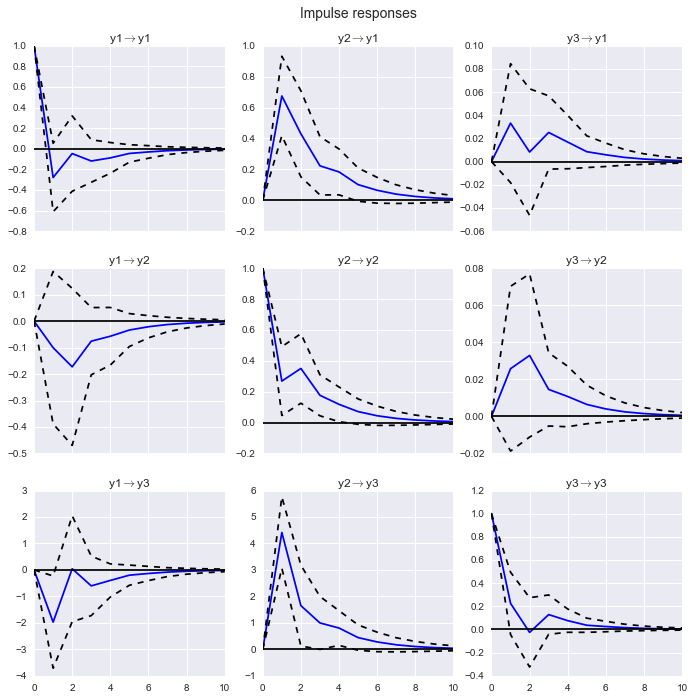

In [81]:
# Impulse responses can be generated and plotted thusly:
irf = res.irf(10) # 10 periods
irf.plot() #realgdp->realgdp, realcons->realgdp

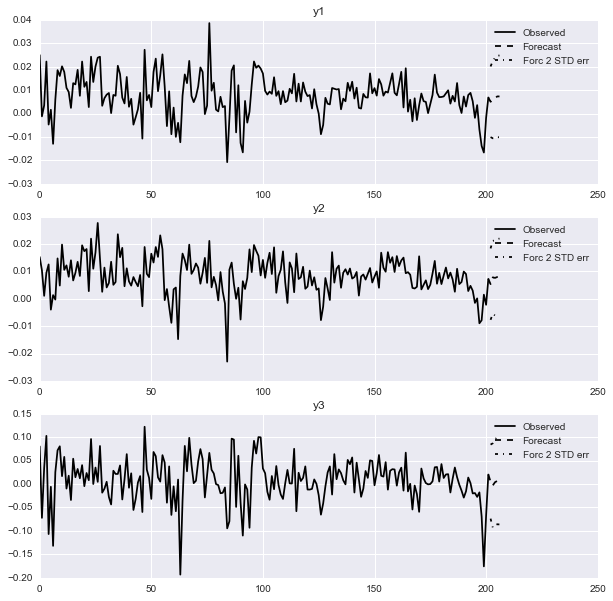

In [87]:
#n-step ahead forecasts can similarly be generated and plotted:
res.plot_forecast(5)

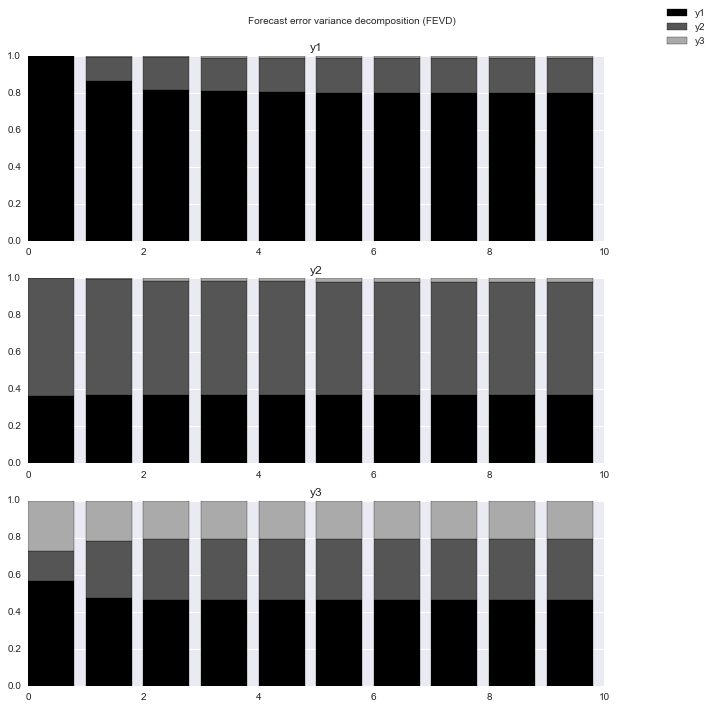

In [88]:
#The forecast error variance decomposition can also be computed
#and plotted like so
res.fevd().plot()

In [89]:
#lag order selection
model.select_order(15)

                 VAR Order Selection                  
            aic          bic          fpe         hqic
------------------------------------------------------
0        -27.70       -27.65    9.358e-13       -27.68
1        -28.02      -27.82*    6.745e-13      -27.94*
2        -28.03       -27.66    6.732e-13       -27.88
3       -28.04*       -27.52   6.651e-13*       -27.83
4        -28.03       -27.36    6.681e-13       -27.76
5        -28.02       -27.19    6.773e-13       -27.69
6        -27.97       -26.98    7.147e-13       -27.57
7        -27.93       -26.79    7.446e-13       -27.47
8        -27.94       -26.64    7.407e-13       -27.41
9        -27.96       -26.50    7.280e-13       -27.37
10       -27.91       -26.30    7.629e-13       -27.26
11       -27.86       -26.09    8.076e-13       -27.14
12       -27.83       -25.91    8.316e-13       -27.05
13       -27.80       -25.73    8.594e-13       -26.96
14       -27.80       -25.57    8.627e-13       -26.90
15       -

{'aic': 3, 'bic': 1, 'fpe': 3, 'hqic': 1}

In [91]:
results = model.fit(maxlags=15, ic='aic')

### now do same but use our data

## Polynomial Features
[Top](#Table-of-contents)

In [38]:
data = pd.read_csv("C:/Users/msteinme/Documents/CrudeUreaCorrelation.csv")
data.head()

,Date,Crude,Urea
0,1/5/1996,19.65,220
1,1/12/1996,17.98,220
2,1/19/1996,18.25,218
3,1/26/1996,17.36,215
4,2/2/1996,17.38,205


In [39]:
data['Date'] = pd.to_datetime(data['Date'])
date = data['Date']
print(data.dtypes)
data.index = data['Date'].values
data = data.drop(['Date'],axis=1)
data.head(2)

Date     datetime64[ns]
Crude           float64
Urea              int64
dtype: object


,Crude,Urea
1996-01-05,19.65,220
1996-01-12,17.98,220
